## waste management using cnn model

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.21-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp311-cp311-win_amd64.whl.me

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
pip install pandas


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.6 MB 1.8 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.6 MB 2.2 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.6 MB 2.6 MB/s eta 0:00:04
   ---------- ----------------------------- 3.1/11.6 MB 2.7 MB/s eta 0:00:04
   --------------- ------------------------ 4.5/11.6 MB 3.2 MB/s eta 0:00:03
   -------------------- ------------------- 6.0/11.6 MB 3.7 MB/s eta 0:00:02
   -------------------------- ------------- 7.6/11.6 MB 4.2 MB/s eta 0:00:01
   ----------------------------- ---------- 8.7/11.6 MB 4.3 MB/s eta 0:00:01
   ------------------------------------- -- 10.7/11.6 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 4.9 MB/s eta 0:00:00
Note: you m

In [4]:
pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 2.4 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.0 MB 2.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 2.7 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.0 MB 2.9 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.0 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.0 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.0 MB/s eta 0:00:00
   ------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings

warnings.filterwarnings('ignore')

In [2]:
train_path ='dataset/TRAIN'
test_path= 'dataset/TEST'

In [7]:
#importing tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation,Dropout,Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [11]:
#visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm (glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [03:32<00:00, 47.13it/s]


In [12]:
data.shape

(22564, 2)

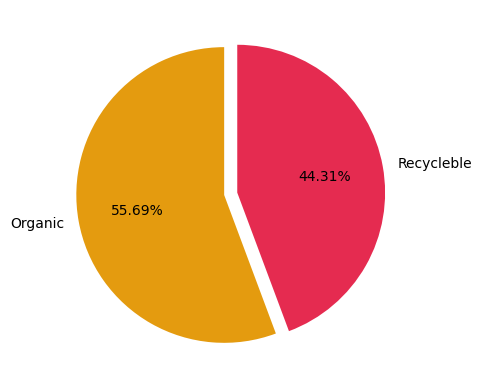

In [29]:
colors = ['#E49B0F' , '#E52B50']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recycleble'],autopct='%0.2f%%', colors=colors, startangle=90, explode = [0.03, 0.06])
plt.show()